<h3> Importing the Libraries </h3>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

<h2> Task 1 </h2>

<h3> Loading the Dataset </h3>

In [2]:
# Loading the dataset usinf pandas read_csv method 
df = pd.read_csv("metro_traffic_15_19.csv")

In [3]:
# COnveting the dateime data to the right format 
df['date_time'] =  pd.to_datetime(df['date_time'])

In [4]:
df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936


<h3> Plotting the dataset to check periodicity </h3>

Day-Wise Periodictiy 

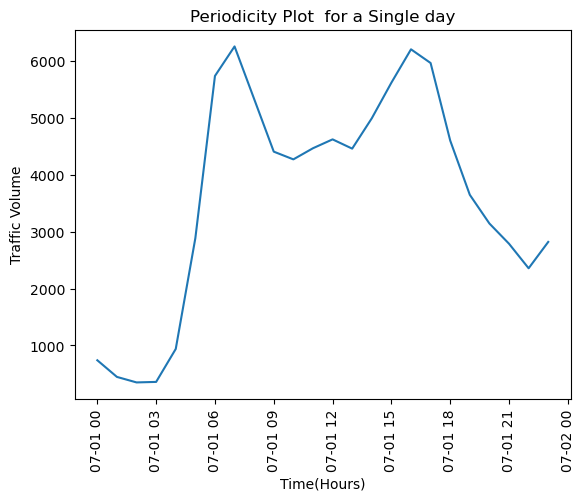

In [5]:
#Plotting the perodicity for a single day
plt.plot(df[df['date_time'] <'2015-07-02']['date_time'], df[df['date_time'] <'2015-07-02']['traffic_volume'])
plt.xlabel('Time(Hours)')
plt.ylabel("Traffic Volume")
plt.title('Periodicity Plot  for a Single day')
plt.tick_params(axis='x', labelrotation=90, labelsize=10 )

<h4>On Analysing the day-wise periodicity we can clearly see that there is a periodicity is daily data with Traffic Volume being at the peak at 2 times of the day, one at around 7 AM and another peak at 4 PM and we have least amount of traffic at 2 AM. </h4>

6 DAY PERIODICITY

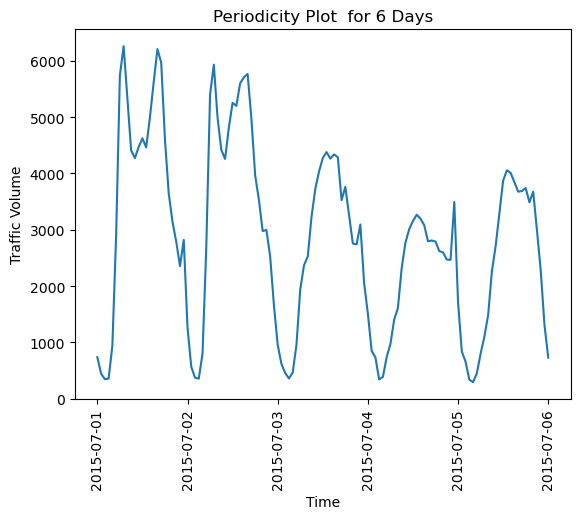

In [6]:
plt.plot(df[df['date_time'] <='2015-07-06']['date_time'], df[df['date_time'] <='2015-07-06']['traffic_volume'])
plt.tick_params(axis='x', labelrotation=90, labelsize=10)
plt.xlabel('Time')
plt.ylabel("Traffic Volume")
plt.title('Periodicity Plot  for 6 Days')
plt.tick_params(axis='x', labelrotation=90, labelsize=10 )

<h4>On Analysing we can see that the same trend for a single day is also followed for other days where the traffic volume peaks for 2  times a day and then drops down to a very high extent everyday at around 2 AM. </h4>

10 DAY PERIODICITY

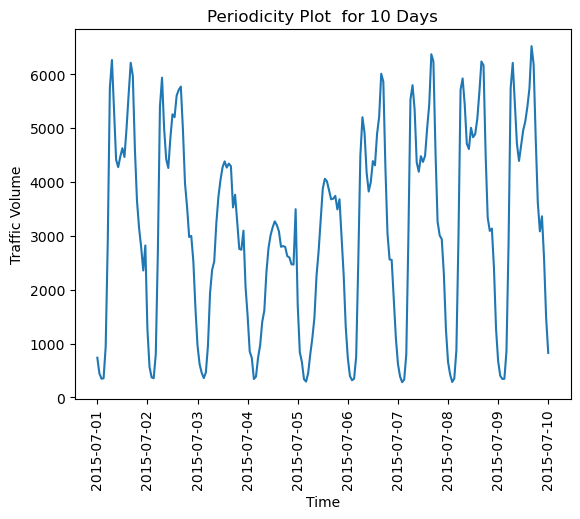

In [7]:
plt.plot(df[df['date_time'] <='2015-07-10']['date_time'], df[df['date_time'] <='2015-07-10']['traffic_volume'])
plt.tick_params(axis='x', labelrotation=90, labelsize=10)
plt.xlabel('Time')
plt.ylabel("Traffic Volume")
plt.title('Periodicity Plot  for 10 Days')
plt.tick_params(axis='x', labelrotation=90, labelsize=10 )

<h4>On further upsampling the data or checking the data for higher frequency we can observe the same pattern again for the 10 day period </h4>

<h2> Task 2 </h2>

<h3> Extracting the hour, day and month feature from Time-Stamps </h3>

In [8]:
#Extracting the date time and hour features from the dataframe
df['day'] = df['date_time'].apply(lambda r:r.day)
df['month'] = df['date_time'].apply(lambda r:r.month)
df['hour'] = df['date_time'].apply(lambda r:r.hour)

In [9]:
df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,day,month,hour
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,1,7,0
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,1,7,1
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,1,7,2
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,1,7,3
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,1,7,4


In [10]:
#Slicing down the target and predictor variables
y = df.iloc[:,5:6]
X = df.iloc[:,[1,2,3,4,6,7,8]]

<h4>Applying the Training and test data split below, As this is a time-series data we need to preserve the order of the data hence we apply the slicing technique directly for this dataset</h4>

In [11]:
X_train = X.iloc[:round(len(X)*2/3 ), :]
y_train = y.iloc[:round(len(y)*2/3 ), :]
X_test = X.iloc[round(len(X)*2/3 ):, :]
y_test = y.iloc[round(len(y)*2/3 ):, :]

<h3> Implementation of Linear Regression </h3>

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
predicted = lr.predict(X_test)

In [14]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,predicted))
from sklearn.metrics import r2_score
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted))

RMSE SCORE- 1833.9748010324852
R2 SCORE- 0.13664167952424822


<h4> We can clearly see that the Linear regression does not fill in the dataset very well as we have observed very high Root Mean square score and very low R2 Score </h4>

<h3> Implementation of the Polynomial regression </h3>

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 5)
X_poly = pf.fit_transform(X_train)

In [16]:
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

X_poly2 = pf.fit_transform(X_test)
predicted_2 = lin2.predict(X_poly2)

In [17]:
rmse = math.sqrt(mean_squared_error(y_test,predicted_2))
rmse
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted_2))

RMSE SCORE- 1142.6349617394205
R2 SCORE- 0.6648653232967224


<h4> Polynomial regression fits the dataset much well as compared to Logistic Regression</h4>

<h2> Task 3 </h2>

In [18]:
# Taking the copy of the dataframe for further processing 
df1= X.copy(deep = True)

In [19]:
df1.head()

,rain_1h,snow_1h,temp,clouds_all,day,month,hour
0,0.0,0.0,289.20,1,1,7,0
1,0.0,0.0,289.40,1,1,7,1
2,0.0,0.0,289.19,1,1,7,2
3,0.3,0.0,288.74,1,1,7,3
4,0.0,0.0,288.07,1,1,7,4


<h3> Converting the Day, Hour and Month Data in cyclical form </h3>

In [20]:
import numpy as np
df1['hr_sin'] = np.sin(df1.hour*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1.hour*(2.*np.pi/24))
df1['mnth_sin'] = np.sin((df1.month-1)*(2.*np.pi/12))
df1['mnth_cos'] = np.cos((df1.month-1)*(2.*np.pi/12))
df1['day_sin'] = np.sin((df1.day-1)*(2.*np.pi/31))
df1['day_cos'] = np.cos((df1.day-1)*(2.*np.pi/31))

The sin and cos representation allowed us to represent time in more periodic and meaningful, compact format, We took both the sin and cos columns as only taking one column would not lead a complete cyclical format hence we need both the columns 

In [21]:
# Dropping out the non-required Day Hour and Month column as now we have the cyclical data
df1.drop(columns = ['day' , 'month' ,'hour' ], inplace = True)

In [22]:
df1.head()

,rain_1h,snow_1h,temp,clouds_all,hr_sin,hr_cos,mnth_sin,mnth_cos,day_sin,day_cos
0,0.0,0.0,289.20,1,0.000000,1.000000,1.224647e-16,-1.0,0.0,1.0
1,0.0,0.0,289.40,1,0.258819,0.965926,1.224647e-16,-1.0,0.0,1.0
2,0.0,0.0,289.19,1,0.500000,0.866025,1.224647e-16,-1.0,0.0,1.0
3,0.3,0.0,288.74,1,0.707107,0.707107,1.224647e-16,-1.0,0.0,1.0
4,0.0,0.0,288.07,1,0.866025,0.500000,1.224647e-16,-1.0,0.0,1.0


<h3> Plotting out the Cyclical Day Hour and Month Data </h3>

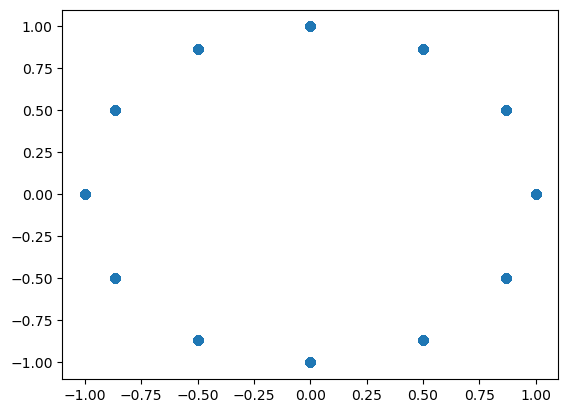

In [23]:
plt.scatter(df1['mnth_sin'], df1['mnth_cos'])

We can see that after conversion of month column in cyclical form using sin and cos functions the two component column e.g mnth_sin and mnth_cos form a circlular form on the scatter plot showing their cyclical pattern, Also to note there are 12 months in total and we can see 12 points on the scatter plot as well

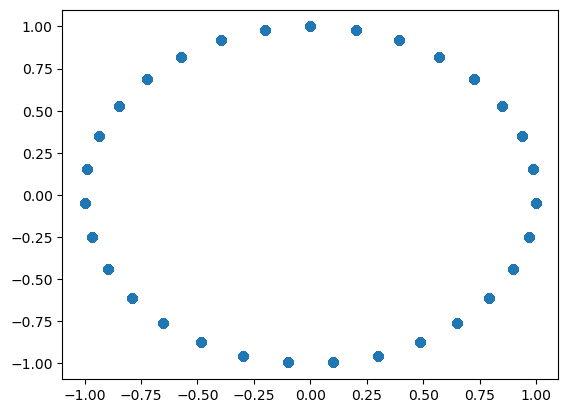

In [24]:
plt.scatter(df1['day_sin'], df1['day_cos'])

Plotting the Day data after conversion into the cyclical form we can see the same cyclical trend in the scatter plot as well with each point representing each day of the Month 

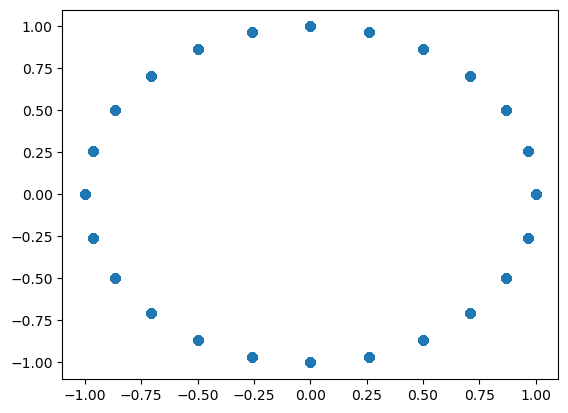

In [25]:
plt.scatter(df1['hr_sin'], df1['hr_cos'])

Same trend as observed for the Day and month data can be observed after plotting the hour data using sin and cos components, we can see that they also form a cyclical form 

In [26]:
# Dividing the test and train data in the same ratio of 2/3 Train size and 1/3 test size 
X_train = df1.iloc[:round(len(df1)*2/3 ), :]
X_test = df1.iloc[round(len(df1)*2/3 ):, :]

<h4> LINEAR REGRESSION AFTER CYCLICAL ENCODING </h4>

In [27]:
# Training the linear regression model on the Training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Testing the accuracy of the Linear regression model on the Test dataset 
predicted = lr.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test,predicted))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted))

RMSE SCORE- 1184.478012335873
R2 SCORE- 0.63987078277088


<h4> OBSERVATION </h4>

We can clearly see that the accuracy of the Linear regression has Improved drastically as the earlier score was 
* Ealier RMSE SCORE- 1142.6349617394205
* Earlier R2 SCORE- 0.6648653232967224
However now the RMSE score has decreased and consequently the R2 Score value has increased signifying the cyclical conversion of data for Day Month and Hour columns using the sin and cos functions has given more meaningful representation to the dataset.

<h4> POLYNOMIAL REGRESSION AFTER CYCLICAL ENCODING </h4>

In [29]:
#Training the Polynomial regression model 
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 5)
X_poly = pf.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

X_poly2 = pf.fit_transform(X_test)

predicted_2 = lin2.predict(X_poly2)

rmse = math.sqrt(mean_squared_error(y_test,predicted_2))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted_2))

RMSE SCORE- 1013.7520979713759
R2 SCORE- 0.7362041964464958


<h4> OBSERVATION </h4>

Similary we can see that the overall prediction accuracy has also improved for the Polynomial regression as the Earlier scores were 

* Earlier RMSE SCORE- 1142.6349617394205
* Earlier R2 SCORE- 0.6648653232967224


<h2> Task 4 </h2>

<h3 >For this task I tried and tested various techniques and have included all of them in the Notebook. However I implemented just two of them on my training and test data which were RFE Algorithm and the Select K-Best Algorithm. The reason I just checked other approached were to get more intution on how basically the Feature selection Technique works   </h3>

<AxesSubplot:>

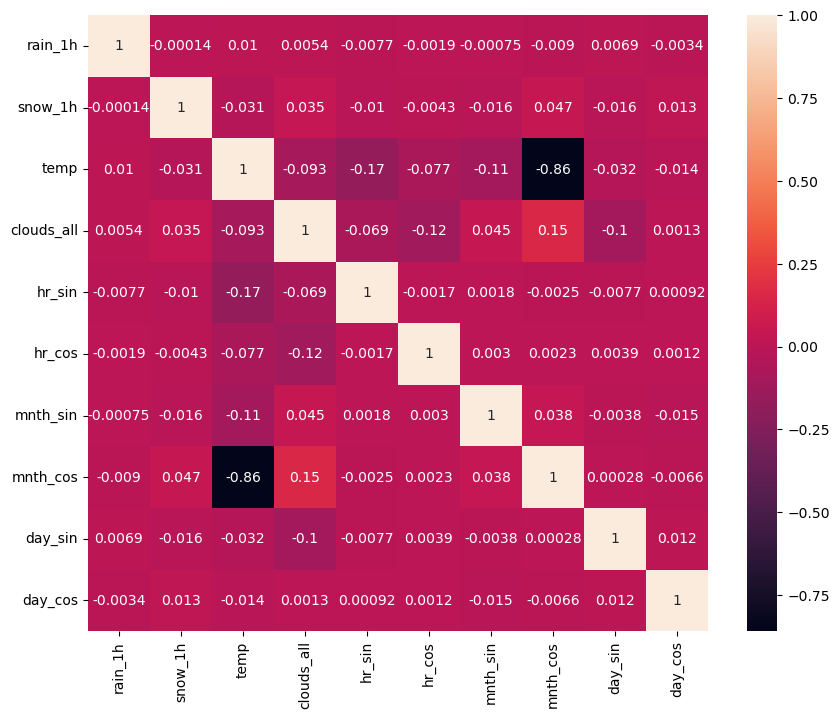

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,8))
corr = df1.corr()
sns.heatmap(corr, annot= True)

First I tried checking the correlation betweeen various features using the correlation heatmap , Correlation is a measure of the linear relationship of 2 or more variables, two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here

In [31]:
from sklearn.feature_selection import VarianceThreshold
v_threshold = VarianceThreshold(threshold = 0.1 )
v_threshold.fit(df1)
a = v_threshold.get_support()
for i in range(0,len(a)):
    print(df1.columns[i],'--', a[i])

rain_1h -- True
snow_1h -- False
temp -- True
clouds_all -- True
hr_sin -- True
hr_cos -- True
mnth_sin -- True
mnth_cos -- True
day_sin -- True
day_cos -- True


Next, I tried to check the variance threshold feature selection method the main idea behind this method was to check the variance of each column as the more the feature has variance the more information it contains in it and the more useful the feature is 

<h3>IMPLEMENTATION OF FEATURE SELECTION USING RFE METHOD </h3>

Implementing the RFE Method using Linear Regression 

In [32]:
from sklearn.feature_selection import RFE

rfe = RFE(LinearRegression(), n_features_to_select = 5)
rfe.fit(X_train, y_train)
a= rfe.support_
b = rfe.ranking_
for i in range(0,len(a)):
    print(df1.columns[i],'--', a[i], '(Rank-', b[i], ')')

rain_1h -- False (Rank- 6 )
snow_1h -- True (Rank- 1 )
temp -- False (Rank- 4 )
clouds_all -- False (Rank- 5 )
hr_sin -- True (Rank- 1 )
hr_cos -- True (Rank- 1 )
mnth_sin -- True (Rank- 1 )
mnth_cos -- True (Rank- 1 )
day_sin -- False (Rank- 3 )
day_cos -- False (Rank- 2 )


Implementing the RFE Method using Polynomial Regression Method 

In [33]:
rfe = RFE(lin2, n_features_to_select = 5)
rfe.fit(X_train, y_train)
a= rfe.support_
b = rfe.ranking_
for i in range(0,len(a)):
    print(df1.columns[i],'--', a[i], '(Rank-', b[i], ')')

rain_1h -- False (Rank- 6 )
snow_1h -- True (Rank- 1 )
temp -- False (Rank- 4 )
clouds_all -- False (Rank- 5 )
hr_sin -- True (Rank- 1 )
hr_cos -- True (Rank- 1 )
mnth_sin -- True (Rank- 1 )
mnth_cos -- True (Rank- 1 )
day_sin -- False (Rank- 3 )
day_cos -- False (Rank- 2 )


In our case we ran the Feature selection RFE Algorithm for 2 models the Linear regression model and the polynomial regression model and we can see that the algorithm has returned similar rank of features in both the method hence we get the same subset of best features from both the methods 

In [34]:
# Removing the irrelevant features marked by the RFE Method
X_train1 = X_train.columns[a]
X_test1 = X_test.columns[a]
X_train1 = X_train[X_train1]
X_test1 = X_test[X_test1]

In [35]:
X_train1.head()

,snow_1h,hr_sin,hr_cos,mnth_sin,mnth_cos
0,0.0,0.000000,1.000000,1.224647e-16,-1.0
1,0.0,0.258819,0.965926,1.224647e-16,-1.0
2,0.0,0.500000,0.866025,1.224647e-16,-1.0
3,0.0,0.707107,0.707107,1.224647e-16,-1.0
4,0.0,0.866025,0.500000,1.224647e-16,-1.0


<h2> Testing out the accuracy of the model after dropping out the non-relevant features from feature selection task </h2

In [36]:
# Training the Linear Regression model on the new less feature dataset and testing using the accuracy using the test dataset 
lr = LinearRegression()
lr.fit(X_train1, y_train)
predicted = lr.predict(X_test1)
rmse = math.sqrt(mean_squared_error(y_test,predicted))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted))

RMSE SCORE- 1182.5221601434948
R2 SCORE- 0.6410591171764012


The Accuracy for the Linear Regression Model has improved than from the cylical representation one as the Earlier accracy scores for Linear Regression were 
* RMSE SCORE- 1184.478012335873
* R2 SCORE- 0.63987078277088

In [37]:
# Training the Polynomical Regression model on the new less feature dataset and testing using the accuracy using the test dataset 
pf = PolynomialFeatures(degree = 5)
X_poly = pf.fit_transform(X_train1)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

X_poly2 = pf.fit_transform(X_test1)

predicted_2 = lin2.predict(X_poly2)

rmse = math.sqrt(mean_squared_error(y_test,predicted_2))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted_2))

RMSE SCORE- 950.5648315450295
R2 SCORE- 0.7680641748985402


The Accuracy for the Polynomial Regression Model has improved than from the cylical representation one as the Earlier accracy scores for Polynomial Regression were
* RMSE SCORE- 1013.7520979713759
* R2 SCORE- 0.7362041964464958

RFE or the Recursive Feature Elimination feature selection Method. RFE algorithm works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains or until the speified feature numbers is reached.

The RFE Feature Selection Algorithm works by fitting the given machine Learning model for our case it was Linear regression and Polynomial regression in another case then it ranks feature by their importance and discards the least important features, It then refits the model, This process is repeated until the specified number of features is reached.

We can clearly see that the Accuracy of both  the Linear Regression model and the Polynomial regression model imporved after removal of the features ranked least important by the RFE Method, The reason for that is because the feature selection method helps us in the removal of the least important or the redundant features, Hence leads to the increase in the accuracy of the model as the model learns only from the most important features. In short Feature selection Algorithm helps removing teh irrelevant, redundant, and noisy features that can pollute an algorithm, negatively impact learning performance, accuracy, and computational cost.

<h2> Implementation of another feature selection technique (Select K Best) </h2>

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
features = SelectKBest(score_func = f_regression, k =5).fit(X_train, y_train).scores_
support = SelectKBest(score_func = f_regression, k =5).fit(X_train, y_train).get_support()
for i in range(0,len(X_train.columns)):
    print(X_train.columns[i],'--', features[i],'--', support[i])

rain_1h -- 1.1543525127230347 -- False
snow_1h -- 0.03876142332000537 -- False
temp -- 350.87559492206674 -- True
clouds_all -- 132.36658322984235 -- True
hr_sin -- 1245.9275478003985 -- True
hr_cos -- 30324.793040790617 -- True
mnth_sin -- 32.75423848794254 -- True
mnth_cos -- 16.495868722831393 -- False
day_sin -- 1.7603964971686925 -- False
day_cos -- 4.422338004628539 -- False


C:\Users\Puru\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Puru\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
X_train2 = X_train.columns[support]
X_test2 = X_test.columns[support]
X_train2 = X_train[X_train2]
X_test2 = X_test[X_test2]

In [40]:
lr = LinearRegression()
lr.fit(X_train2, y_train)
predicted = lr.predict(X_test2)
rmse = math.sqrt(mean_squared_error(y_test,predicted))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted))

RMSE SCORE- 1181.8136276779032
R2 SCORE- 0.6414891219346532


In [41]:
pf = PolynomialFeatures(degree = 5)
X_poly = pf.fit_transform(X_train2)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

X_poly2 = pf.fit_transform(X_test2)

predicted_2 = lin2.predict(X_poly2)

rmse = math.sqrt(mean_squared_error(y_test,predicted_2))
print('RMSE SCORE-', rmse)
print('R2 SCORE-' ,r2_score(y_test, predicted_2))

RMSE SCORE- 981.12772882461
R2 SCORE- 0.7529098400366075


We can see that the select K-Best algorithm provided us with a completely different set of features which the algorithm considers as the best for the model, The reason for that is beacuse both the models employ different approaches when trying to eliminate the features. SelectKBest method selects the features according to the k highest score.

However we can see that the RFE Algorithm yielded better results in terms of accuracy for the feature selection 

<h1> Conclusion for Task4 </h1>

We identified our best Features were  	
* snow_1h
* hr_sin 
* hr_cos 
* mnth_sin 
* mnth_cos

As they returned the maximum accuracy from both the Polynomial and Linear regression Algorithm